In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *

Lets assume we have a 100 linearly distributed data points and the same can be represented as y = 4*x + 2

In [3]:
n=100
x = torch.ones(n,2)

In [4]:
x[:,0].uniform_(0,5)

tensor([1.1637, 3.9283, 0.2077, 4.8341, 1.4929, 0.3220, 4.7479, 2.4326, 0.6663,
        4.0048, 1.4409, 3.6784, 2.1294, 4.3751, 2.1961, 3.3935, 3.1836, 2.4931,
        2.1611, 2.1339, 4.5269, 2.7861, 0.5119, 4.2643, 3.2753, 2.2214, 1.3350,
        0.1158, 0.4872, 0.9811, 3.5825, 4.3807, 0.7197, 1.5248, 2.4887, 1.1639,
        4.3045, 4.2880, 1.9687, 1.4810, 1.1369, 0.6944, 1.5715, 0.2575, 2.1705,
        0.7672, 0.2905, 3.7639, 2.4856, 0.7907, 4.7460, 0.4474, 4.2854, 2.2950,
        4.3373, 2.1180, 4.7629, 2.2321, 0.8596, 2.6563, 3.3837, 3.1366, 0.8172,
        4.8598, 4.6490, 2.4190, 4.2305, 2.4079, 1.1308, 3.0335, 3.4906, 4.4664,
        1.9789, 4.0046, 4.5557, 2.7685, 1.5910, 3.7854, 1.7608, 4.3825, 2.5678,
        0.3547, 2.8000, 1.0978, 4.1012, 2.7635, 1.9839, 2.1012, 3.6419, 3.5196,
        1.3976, 3.5055, 1.6795, 2.8767, 0.6449, 2.7567, 1.4030, 0.0159, 3.2898,
        2.2038])

In [21]:
coeff = tensor(4.,5); coeff

tensor([4., 5.])

Why the matrix multiplication of integer is not allowed where as float works fine.

In [22]:
y = x@coeff + torch.rand(n)

In [23]:
y

tensor([ 9.6729, 21.6030,  5.9806, 24.7784, 11.5323,  6.5260, 24.4700, 14.7419,
         8.6619, 21.9761, 11.0265, 20.0782, 14.4081, 23.2578, 14.4188, 18.6452,
        18.3925, 15.1847, 13.9416, 14.0548, 23.5229, 16.1636,  7.9019, 22.9830,
        18.4258, 14.3829, 10.9413,  6.2326,  7.1125,  9.4960, 19.4697, 22.6098,
         8.6852, 11.4541, 15.6044, 10.3031, 22.7362, 22.2211, 13.0038, 11.6824,
        10.1798,  8.1071, 12.1935,  6.9504, 14.2582,  8.1856,  6.6149, 20.4093,
        15.1754,  8.4251, 24.8649,  7.0151, 22.3684, 14.2844, 22.7122, 14.3205,
        24.0884, 14.6258,  8.6730, 16.3053, 19.2074, 18.4646,  8.9770, 25.3464,
        24.1796, 15.6576, 22.2742, 14.7951,  9.8901, 17.8583, 19.7161, 22.9519,
        13.1681, 21.5007, 23.3971, 16.7403, 12.2521, 20.3854, 12.2095, 23.1110,
        15.7118,  6.4850, 16.5602, 10.1705, 21.7125, 16.1917, 13.7369, 13.6855,
        20.1721, 19.2351, 11.0358, 19.5861, 12.1644, 17.0091,  8.3505, 16.4952,
        11.4960,  5.8017, 18.5944, 13.97

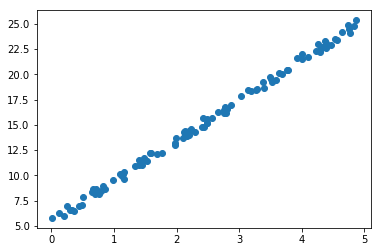

In [24]:
plt.scatter(x[:,0],y);

Assume we had only x and y and we wanted to find coeff. In such case we have to go with gradient descent.

In [28]:
coeff_new = tensor(-1.,1)

In [29]:
y_hat = x@coeff_new + torch.rand(n)

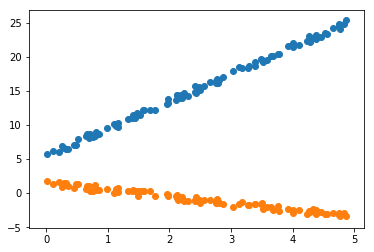

In [35]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat);

In [33]:
def mse(y , y_hat):
    return sum((y-y_hat)**2)/len(y)

In [34]:
mse(y, y_hat)

tensor(314.1893)

Pytorch provides neural net parameters which can be used to as coefficients instead of plane tensors and that will allow us to capture the gradients for each operation.

In [67]:
ab = nn.Parameter(tensor(-1,1.)) #notice the nn.Paramter is a wrapper on top of tensor that allows us to capture the gradient
ab #This indicated the tensor is updated with some paramter

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [68]:
lr=0.1 #set learning rate to something low.
for t in range(150):
    y_hat = x@ab + torch.rand(n) #calculate the y based on new ab
    loss = mse(y, y_hat) #calculate the losses
    loss.backward() #creates the gradient for current tensor
    if t % 10 == 0:
        print(loss); # for every 10th iteration print the loss
    with torch.no_grad(): #for the operations below there wont be any grad calculation
        ab.sub_(lr*ab.grad) #update the coefficients as we go
        ab.grad.zero_() # set the grad to 0 so that further grad can be calculated without any past influence.

tensor(318.4089, grad_fn=<DivBackward0>)
tensor(2.6993, grad_fn=<DivBackward0>)
tensor(0.5076, grad_fn=<DivBackward0>)
tensor(0.2729, grad_fn=<DivBackward0>)
tensor(0.2300, grad_fn=<DivBackward0>)
tensor(0.1801, grad_fn=<DivBackward0>)
tensor(0.1711, grad_fn=<DivBackward0>)
tensor(0.1646, grad_fn=<DivBackward0>)
tensor(0.1938, grad_fn=<DivBackward0>)
tensor(0.2133, grad_fn=<DivBackward0>)
tensor(0.1730, grad_fn=<DivBackward0>)
tensor(0.2210, grad_fn=<DivBackward0>)
tensor(0.2039, grad_fn=<DivBackward0>)
tensor(0.1739, grad_fn=<DivBackward0>)
tensor(0.1756, grad_fn=<DivBackward0>)


In [69]:
ab

Parameter containing:
tensor([3.9845, 5.0017], requires_grad=True)

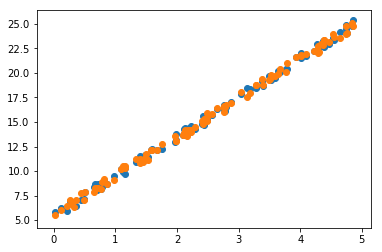

In [70]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat);